# CCA on GTEx

This notebook explores the latent space created by several types of models:

- **PCA baseline:** How do images and genes cluster independently?
- **Linear CCA:**   How do images and genes cluster with a well-understood statistical method?
- **Conv CCA:**     How do genes and images cluster with convolutional layers for one of the transformations?

In [4]:
%cd /Users/gwg/local/dmcm
%matplotlib inline

/Users/gwg/local/dmcm


In [5]:
from   data import GTExConfig, GTExDataset
import plotutils
import exploader
import analyzer
import torch

In [6]:
dataset = GTExDataset(GTExConfig())
images = dataset.images.numpy()

# PCA on gene expression data

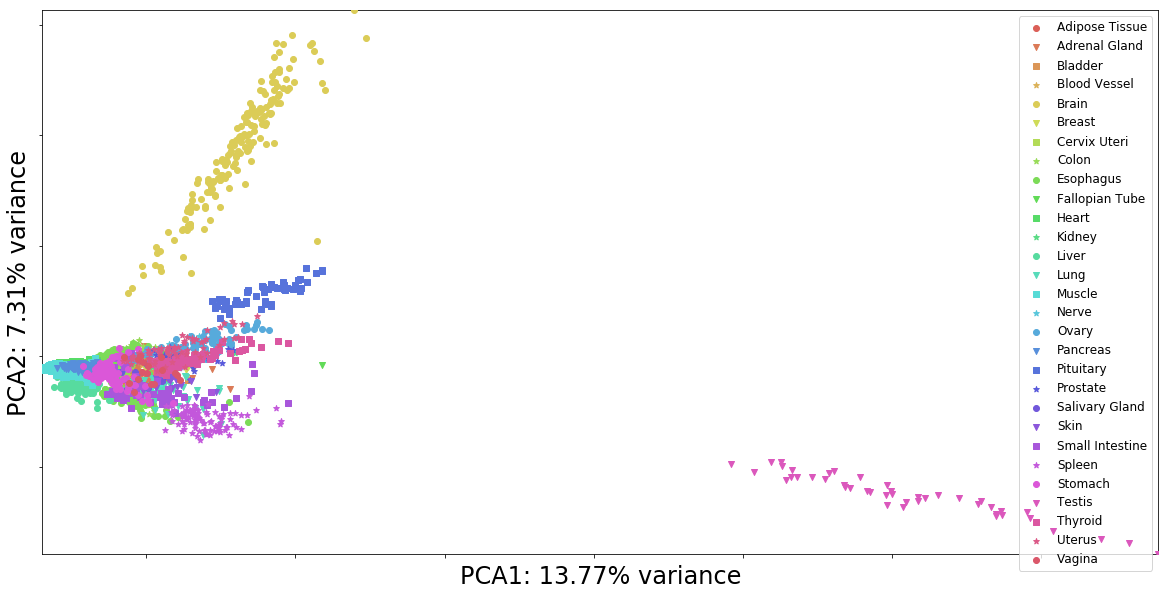

In [7]:
genes = dataset.genes.numpy()
plotutils.plot_both_embeddings([genes], subtitles=['Genes'], dataset=dataset)

# PCA on imaging data

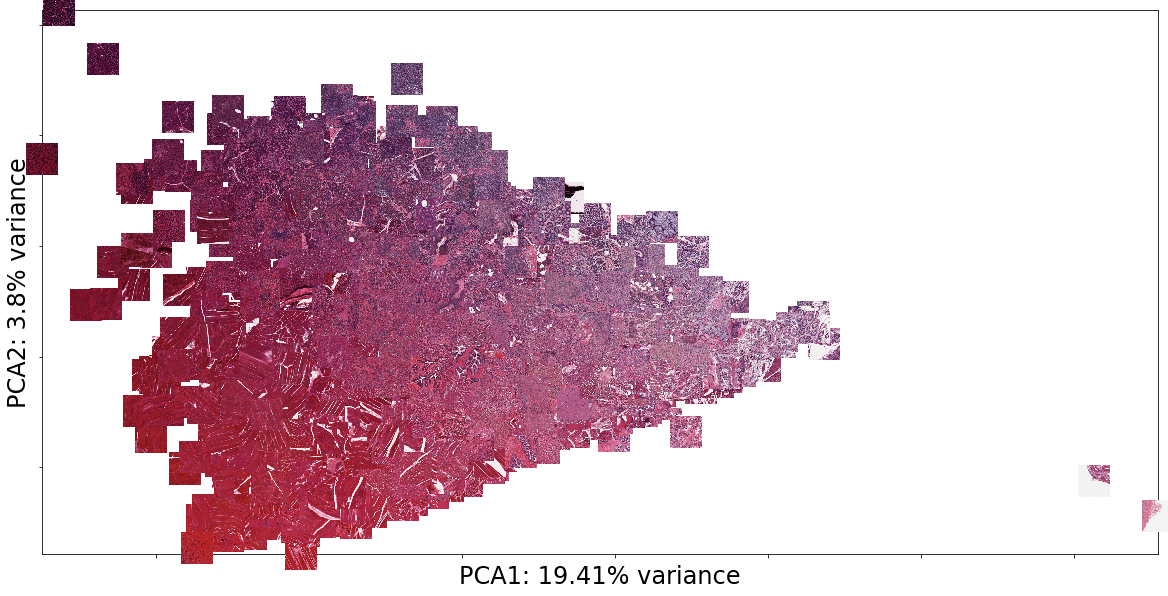

In [13]:
images_vecs = dataset.images.view(-1, 3 * 128 * 128)
plotutils.plot_both_embeddings([images_vecs], subtitles=['Images'], dataset=dataset, images=images, frameon=False)

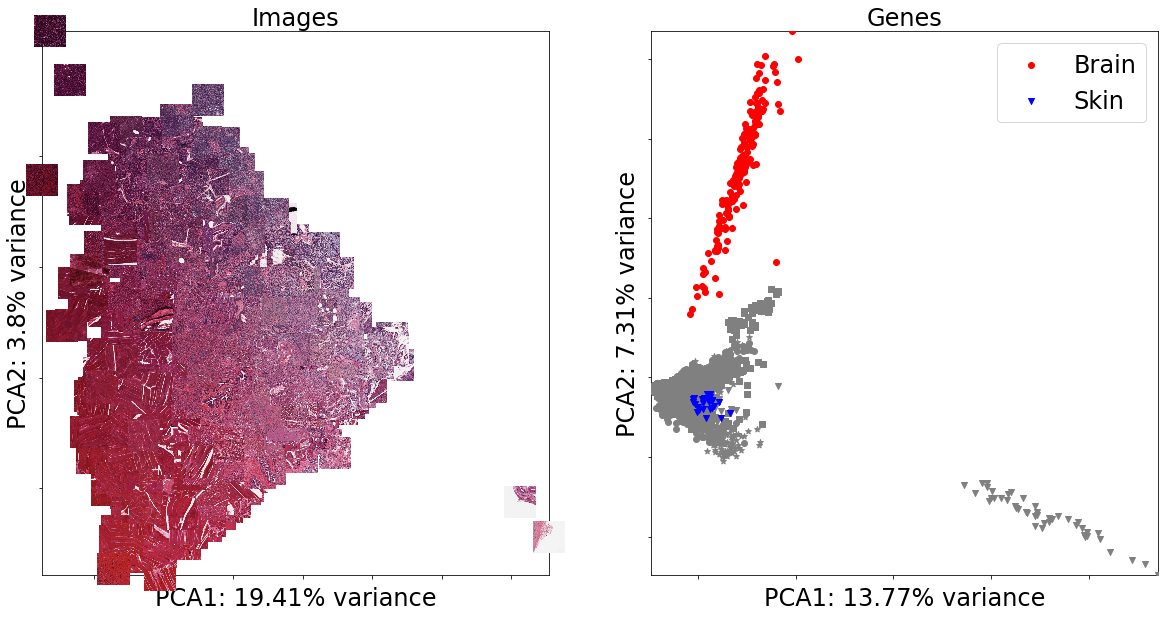

In [14]:
images_vecs = dataset.images.view(-1, 3 * 128 * 128)
plotutils.plot_both_embeddings([images_vecs, genes], dataset=dataset, images=images, frameon=False)

# PCA on concatenated genes and images

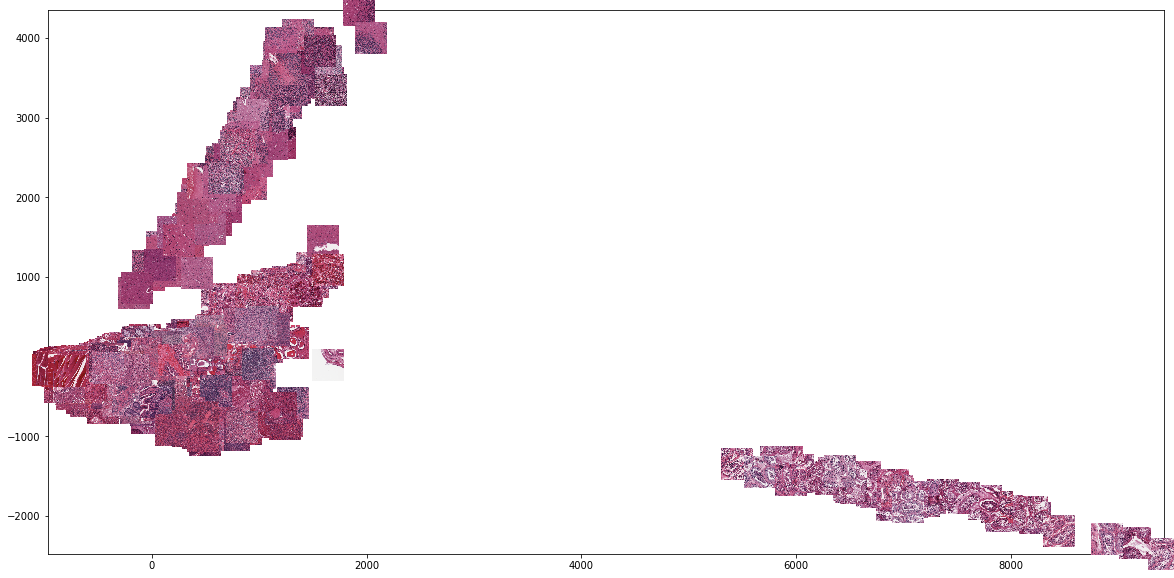

In [12]:
genes = dataset.genes
images_vecs = dataset.images.view(-1, 3 * 128 * 128)
comb = torch.cat((genes, images_vecs), dim=1)
plotutils.plot_both_embeddings([comb], subtitles=['comb'], dataset=dataset, images=images)

# Linear CCA

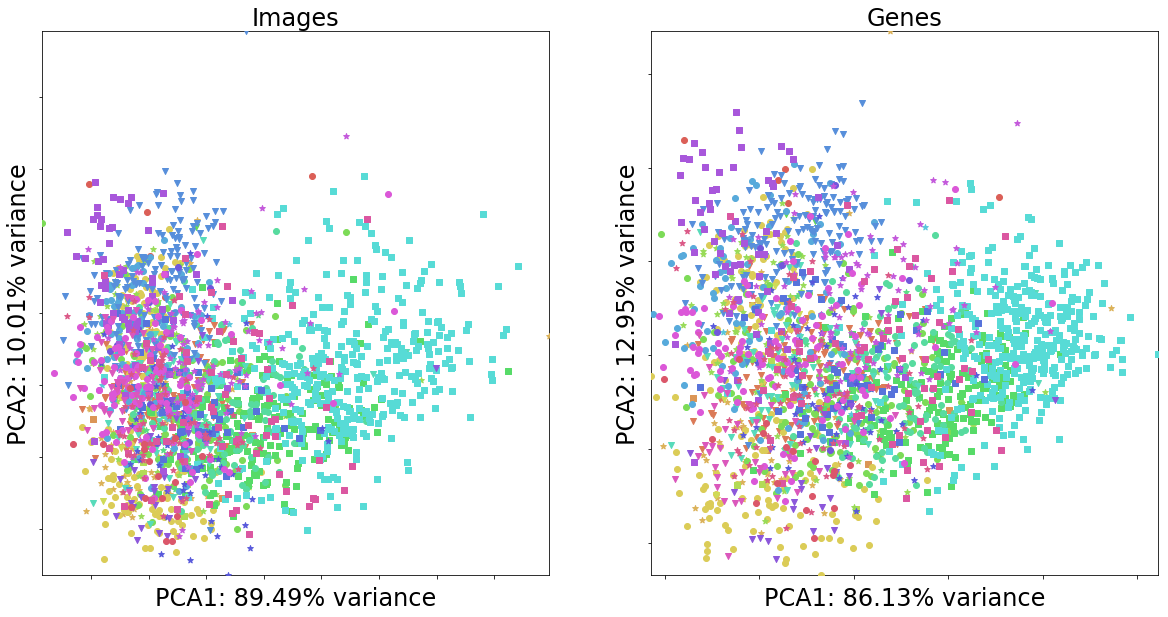

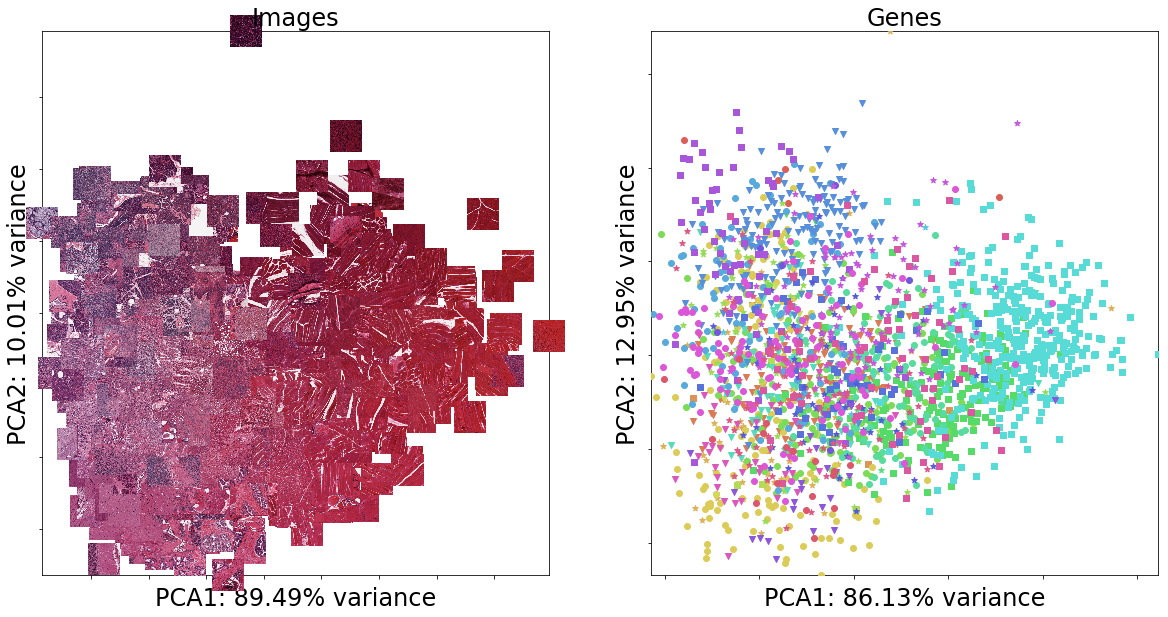

In [7]:
directory = '20180408_gtex-all_linear-cca/gtex_lr-0.0001'
Z1, Z2    = exploader.load_embeddings(directory)
plotutils.plot_both_embeddings([Z1, Z2], dataset=dataset)
plotutils.plot_both_embeddings([Z1, Z2], dataset=dataset, images=images, frameon=False)

# Conv CCA with dissimilarity penalty

- Conv CCA + dissimilar images + genes:

    $$
    \min \sum_{i=1, i \neq j \neq k}^{n} \Big\{ \text{cosDist}(f_x(x_i), f_w(w_i)) - \color{#ff0000}{\text{cosDist}(f_x(x_j), f_w(w_k))}\Big\}
    $$

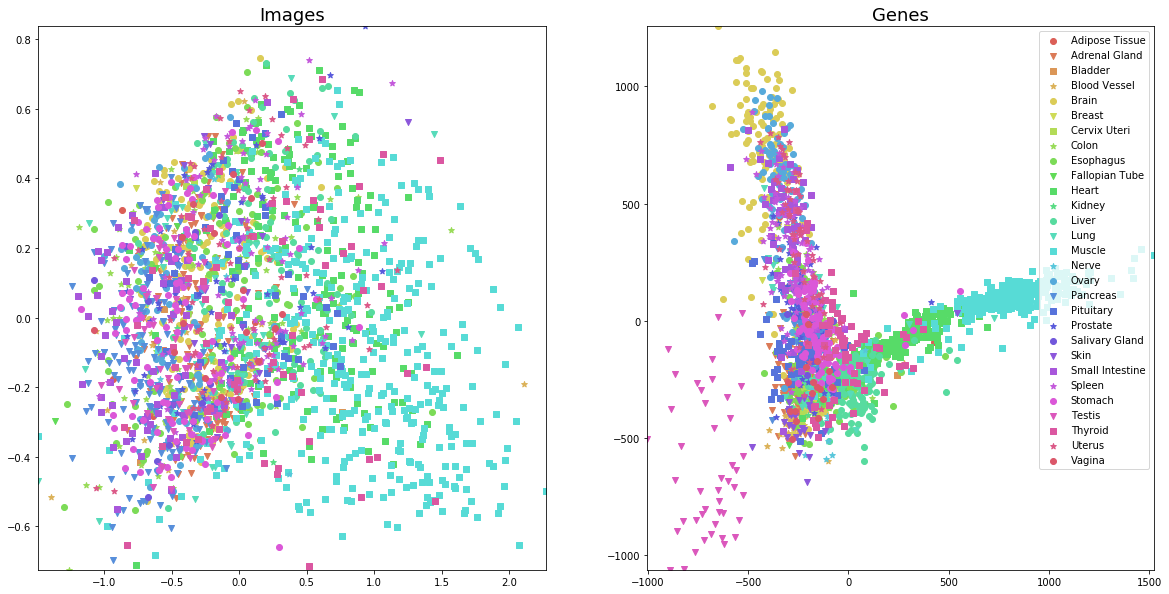

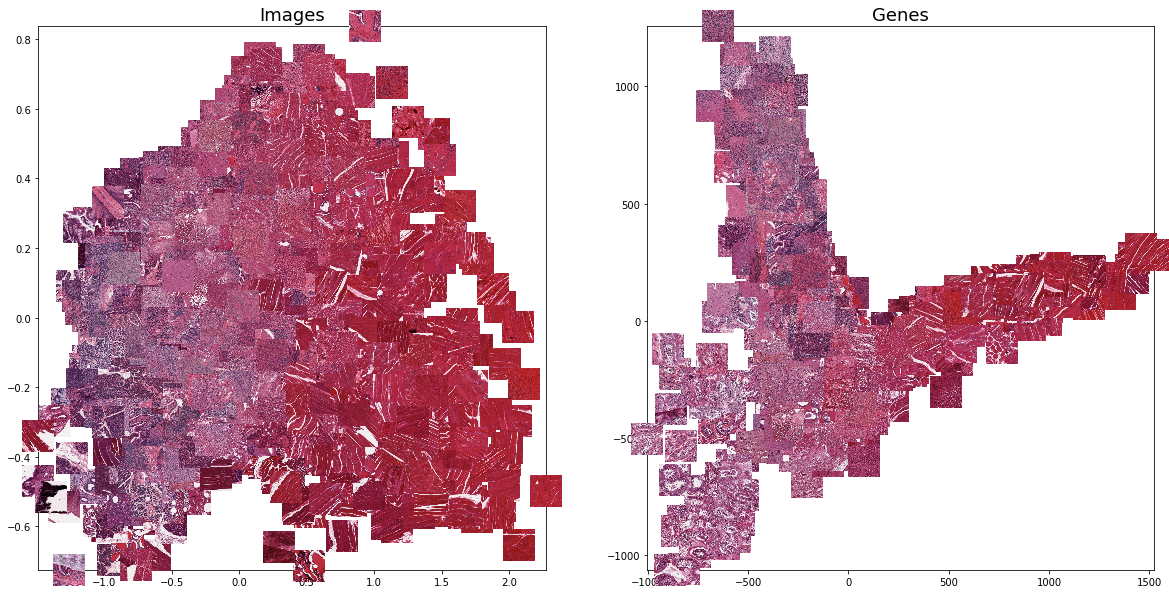

In [14]:
directory = '20180418_gtex_conv-cca_new-dissim/gtex_lr-0.0001'
Z1, Z2    = exploader.load_embeddings(directory)
plotutils.plot_both_embeddings([Z1, Z2], dataset=dataset)
plotutils.plot_both_embeddings([Z1, Z2], dataset=dataset, images=images, images_both=True)